In [741]:
import pandas as pd
import numpy as np

In [742]:
#데이터 전처리
df=pd.read_excel('D:\\Time.xlsx', header=None, index_col=None)
df.head()

,0,1,2,3,4
0,9월19(일,산업공부_자동차:1시간14분,인적성_SK:2시간40분,총합:3시간54분,NaN
1,9월20(월,인적성_SK:2시간31분,NaN,NaN,NaN
2,9월21(화,인적성_SK:3시간58분,NaN,NaN,NaN
3,9월22(수,인적성_SK:1시간31분,NaN,NaN,NaN
4,9월24(금,자기소개서:5시간,NaN,NaN,NaN


In [743]:
df_date=df.rename(columns={0:'date'})
df_date.head()

,date,1,2,3,4
0,9월19(일,산업공부_자동차:1시간14분,인적성_SK:2시간40분,총합:3시간54분,NaN
1,9월20(월,인적성_SK:2시간31분,NaN,NaN,NaN
2,9월21(화,인적성_SK:3시간58분,NaN,NaN,NaN
3,9월22(수,인적성_SK:1시간31분,NaN,NaN,NaN
4,9월24(금,자기소개서:5시간,NaN,NaN,NaN


In [744]:
#요일을 식별하는 열 추가
df_date.insert(1,"day",'요일')
df_date.head()

,date,day,1,2,3,4
0,9월19(일,요일,산업공부_자동차:1시간14분,인적성_SK:2시간40분,총합:3시간54분,NaN
1,9월20(월,요일,인적성_SK:2시간31분,NaN,NaN,NaN
2,9월21(화,요일,인적성_SK:3시간58분,NaN,NaN,NaN
3,9월22(수,요일,인적성_SK:1시간31분,NaN,NaN,NaN
4,9월24(금,요일,자기소개서:5시간,NaN,NaN,NaN


In [745]:
#요일을 식별하는 값 추가
for i, j in enumerate(df_date['date']):
    for n, m in enumerate(j):
        if m == "(":
            #print(df_date['date'][i][n+1])
            df_date['day'][i] = df_date['date'][i][n+1]
df_date.head()

,date,day,1,2,3,4
0,9월19(일,일,산업공부_자동차:1시간14분,인적성_SK:2시간40분,총합:3시간54분,NaN
1,9월20(월,월,인적성_SK:2시간31분,NaN,NaN,NaN
2,9월21(화,화,인적성_SK:3시간58분,NaN,NaN,NaN
3,9월22(수,수,인적성_SK:1시간31분,NaN,NaN,NaN
4,9월24(금,금,자기소개서:5시간,NaN,NaN,NaN


In [747]:
#기상시간을 식별하는 열 추가
df_date.insert(2,"wakeUp",'기상시간')
df_date.head()

,date,day,wakeUp,1,2,3,4
0,9월19(일,일,기상시간,산업공부_자동차:1시간14분,인적성_SK:2시간40분,총합:3시간54분,NaN
1,9월20(월,월,기상시간,인적성_SK:2시간31분,NaN,NaN,NaN
2,9월21(화,화,기상시간,인적성_SK:3시간58분,NaN,NaN,NaN
3,9월22(수,수,기상시간,인적성_SK:1시간31분,NaN,NaN,NaN
4,9월24(금,금,기상시간,자기소개서:5시간,NaN,NaN,NaN


In [749]:
#기상시간을 식별하는 값 추가
for i, j in enumerate(df_date[1]):
    for n, m in enumerate(j):
        if m == "기":
            if df_date[1][i][n+1] == "상":
                df_date['wakeUp'][i] = df_date[1][i][n+5:]
                df_date[1][i] = 0
df_date.head()

,date,day,wakeUp,1,2,3,4
0,9월19(일,일,기상시간,산업공부_자동차:1시간14분,인적성_SK:2시간40분,총합:3시간54분,NaN
1,9월20(월,월,기상시간,인적성_SK:2시간31분,NaN,NaN,NaN
2,9월21(화,화,기상시간,인적성_SK:3시간58분,NaN,NaN,NaN
3,9월22(수,수,기상시간,인적성_SK:1시간31분,NaN,NaN,NaN
4,9월24(금,금,기상시간,자기소개서:5시간,NaN,NaN,NaN


In [750]:
#기상시간 결측값 처리
for i, j in enumerate(df_date['wakeUp']):
    if j == '기상시간':
        df_date['wakeUp'][i] = 0

In [751]:
df_date.tail(5)

,date,day,wakeUp,1,2,3,4
37,11월8(월,월,6시,0,자기소개서_LG이노텍:5시간,자기소개서_고려해운:1시간30분,면접_경동나비엔:5시간30분
38,11월9(화,화,10시30분,0,면접_경동나비엔:4시간,자기소개서_현대트랜시스:2시간40분,NaN
39,11월10(수,수,11시,0,전공공부:1시간58분,NaN,NaN
40,11월11(목,목,9시45분,0,독서:37분,시사/이슈:23분,NaN
41,11월13(토,토,14시,0,자기소개서_LIG넥스원:40분,자기소개서_SK온:1시간23분,자기소개서_세아제강:46분


In [755]:
#활동내용을 식별하는 열 추가
for i, j in enumerate(df_date[1]):
    if j != 0:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[1][i][:n]
                col_len = len(df_date.columns)
                if name not in df_date.columns:
                    df_date.insert(col_len, name, 0)

for i, j in enumerate(df_date[2]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[2][i][:n]
                col_len = len(df_date.columns)
                if name not in df_date.columns:
                    df_date.insert(col_len, name, 0)
                    
for i, j in enumerate(df_date[3]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[3][i][:n]
                col_len = len(df_date.columns)
                if name not in df_date.columns:
                    df_date.insert(col_len, name, 0)
                    
for i, j in enumerate(df_date[4]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[4][i][:n]
                col_len = len(df_date.columns)
                if name not in df_date.columns:
                    df_date.insert(col_len, name, 0)                    

In [757]:
#활동내용을 식별하는 값 추가
for i, j in enumerate(df_date[1]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[1][i][:n]
                df_date[name][i] = df_date[1][i][n+1:]
                df_date[1][i] = 0

for i, j in enumerate(df_date[2]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[2][i][:n]
                df_date[name][i] = df_date[2][i][n+1:]
                df_date[2][i] = 0
                    
for i, j in enumerate(df_date[3]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[3][i][:n]
                df_date[name][i] = df_date[3][i][n+1:]
                df_date[3][i] = 0
                    
for i, j in enumerate(df_date[4]):
    if type(j) == str:
        for n, m in enumerate(j):
            if m == ":":
                name = df_date[4][i][:n]
                df_date[name][i] = df_date[4][i][n+1:]
                df_date[4][i] = 0

<ipython-input-757-8b438ba649c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date[name][i] = df_date[1][i][n+1:]
D:\ana\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-757-8b438ba649c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date[1][i] = 0
<ipython-input-757-8b438ba649c2>:15: SettingWithCopyWarning: 
A valu

In [758]:
#값을 채운 후 필요없는 열 드랍
df_total=df_date.drop([1,2,3,4], axis=1)

In [764]:
#시간을 분 단위로 단위 변환
df_new = df_total.drop(['wakeUp'],axis=1)
for i, j in enumerate(df_new):
    for n, m in enumerate(df_new[j]):
        if m != 0:

            if '분' in m:
                if '시' in m:
                    for a, b in enumerate(m):
                        if b == '시':
                            hour = int(m[:a]) * 60
                            minn = int(m[a+2:5])
                    df_new[j][n] = hour+minn

            if '시' in m:
                if not '분' in m:
                    for a, b in enumerate(m):
                        if b == '시':
                            hour = int(m[:a]) * 60
                    df_new[j][n] = hour

            if '분' in m:
                if not '시' in m:
                    for a, b in enumerate(m):
                        if b == '분':
                            minn = int(m[:a])
                    df_new[j][n] = minn        
df_new.head()

,date,day,산업공부_자동차,인적성_SK,자기소개서,기업찾기,자기소개서_LG전자,인적성_삼성전자,인적성_포스코,면접_영어,면접_포스코,자기소개서_LS,자기소개서_현대자동차,면접_동원,면접_경동나비엔,자기소개서_원익,전공공부,자기소개서_LG이노텍,독서,자기소개서_LIG넥스원,총합,직무공부,자기소개서_ssg,자기소개서_한화정밀기계,자기소개서_이화다이아몬드,자기소개서_고려해운,자기소개서_현대트랜시스,시사/이슈,자기소개서_SK온,자기소개서_현대제철,자기소개서_세아제강
0,9월19(일,일,74,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,0,0,0,0,0,0,0,0,0,0
1,9월20(월,월,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9월21(화,화,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9월22(수,수,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9월24(금,금,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,9월25(토,토,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,9월29(수,수,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,9월30(목,목,0,0,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10월1(금,금,0,0,0,0,113,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10월2(토,토,0,0,0,0,0,53,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [768]:
# 자기소개서, 인적성, 면접 총합을 나타내는 열 추가
for i, j in enumerate(df_new):
    if '자기소개서_' in j:
        #print(j)
        for n,k in enumerate(df_new[j]):
            if type(k) == int:
                if df_new['자기소개서'][n] == 'NaN':
                    df_new['자기소개서'][n] = k
                else :
                    df_new['자기소개서'][n]= df_new['자기소개서'][n] + k
                    
df_new.insert(len(df_new.columns),"인적성",'NaN')
for i, j in enumerate(df_new):
    if '인적성_' in j:
        for n,k in enumerate(df_new[j]):
            if type(k) == int:
                if df_new['인적성'][n] == 'NaN':
                    df_new['인적성'][n] = k
                else :
                    df_new['인적성'][n]= df_new['인적성'][n] + k

df_new.insert(len(df_new.columns),"면접",'NaN')
for i, j in enumerate(df_new):
    if '면접_' in j:
        for n,k in enumerate(df_new[j]):
            if type(k) == int:
                if df_new['면접'][n] == 'NaN':
                    df_new['면접'][n] = k
                else :
                    df_new['면접'][n]= df_new['면접'][n] + k


In [770]:
df_new.head()

,date,day,산업공부_자동차,인적성_SK,자기소개서,기업찾기,자기소개서_LG전자,인적성_삼성전자,인적성_포스코,면접_영어,면접_포스코,자기소개서_LS,자기소개서_현대자동차,면접_동원,면접_경동나비엔,자기소개서_원익,전공공부,자기소개서_LG이노텍,독서,자기소개서_LIG넥스원,총합,직무공부,자기소개서_ssg,자기소개서_한화정밀기계,자기소개서_이화다이아몬드,자기소개서_고려해운,자기소개서_현대트랜시스,시사/이슈,자기소개서_SK온,자기소개서_현대제철,자기소개서_세아제강,인적성,면접
0,9월19(일,일,74,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,0,0,0,0,0,0,0,0,0,0,160,0
1,9월20(월,월,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,0
2,9월21(화,화,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,238,0
3,9월22(수,수,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0
4,9월24(금,금,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,9월25(토,토,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300,0
6,9월29(수,수,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,9월30(목,목,0,0,66,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10월1(금,금,0,0,113,0,113,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
9,10월2(토,토,0,0,0,0,0,53,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,20


In [778]:
df_new.columns

Index(['date', 'day', '총합', '자기소개서', '면접', '인적성', '전공공부', '시사/이슈', '직무공부',
       '기업찾기', '독서', '산업공부_자동차', '자기소개서_LG전자', '자기소개서_원익', '자기소개서_LG이노텍',
       '자기소개서_LIG넥스원', '자기소개서_ssg', '자기소개서_한화정밀기계', '자기소개서_이화다이아몬드',
       '자기소개서_고려해운', '자기소개서_현대자동차', '자기소개서_현대트랜시스', '자기소개서_SK온', '자기소개서_현대제철',
       '자기소개서_세아제강', '자기소개서_LS', '면접_동원', '면접_경동나비엔', '면접_영어', '면접_포스코',
       '인적성_SK', '인적성_삼성전자', '인적성_포스코'],
      dtype='object')

In [779]:
df_new = df_new[['date', 'day', '총합','자기소개서' ,'면접' , '인적성', '전공공부', '시사/이슈', '직무공부', '기업찾기', '독서', 
                 '산업공부_자동차', '자기소개서_LG전자', '자기소개서_원익',  '자기소개서_LG이노텍','자기소개서_LIG넥스원', 
                 '자기소개서_ssg', '자기소개서_한화정밀기계','자기소개서_이화다이아몬드', '자기소개서_고려해운', 
                 '자기소개서_현대자동차',
                 '자기소개서_현대트랜시스' ,  '자기소개서_SK온', '자기소개서_현대제철', '자기소개서_세아제강', '자기소개서_LS',
           '면접_동원', '면접_경동나비엔', '면접_영어', '면접_포스코',
                 '인적성_SK','인적성_삼성전자', '인적성_포스코',   
      ]]

In [781]:
#총합을 나타내는 열 계산
for i in range(0,len(df_new)):
    df_new['총합'][i] = df_new['자기소개서'][i] + df_new['면접'][i]+ df_new['인적성'][i]+ df_new['전공공부'][i]+ df_new['시사/이슈'][i]+ df_new['직무공부'][i]+ df_new['기업찾기'][i]+ df_new['독서'][i]+ df_new['산업공부_자동차'][i]

<ipython-input-781-5c2c3a6a280a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['총합'][i] = df_new['자기소개서'][i] + df_new['면접'][i]+ df_new['인적성'][i]+ df_new['전공공부'][i]+ df_new['시사/이슈'][i]+ df_new['직무공부'][i]+ df_new['기업찾기'][i]+ df_new['독서'][i]+ df_new['산업공부_자동차'][i]


In [803]:
#기상시간 열 다시 합체
df_wake=df_total.drop(['date', 'day', '산업공부_자동차', '인적성_SK', '자기소개서', '기업찾기',
       '자기소개서_LG전자', '인적성_삼성전자', '인적성_포스코', '면접_영어', '면접_포스코', '자기소개서_LS',
       '자기소개서_현대자동차', '면접_동원', '면접_경동나비엔', '자기소개서_원익', '전공공부', '자기소개서_LG이노텍',
       '독서', '자기소개서_LIG넥스원', '총합', '직무공부', '자기소개서_ssg', '자기소개서_한화정밀기계',
       '자기소개서_이화다이아몬드', '자기소개서_고려해운', '자기소개서_현대트랜시스', '시사/이슈', '자기소개서_SK온',
       '자기소개서_현대제철', '자기소개서_세아제강'],axis=1)
df_final = pd.concat([df_new,df_wake],axis=1)

In [843]:
df_final.head()

,date,day,wakeUp,총합,자기소개서,면접,인적성,전공공부,시사/이슈,직무공부,기업찾기,독서,산업공부_자동차,자기소개서_LG전자,자기소개서_원익,자기소개서_LG이노텍,자기소개서_LIG넥스원,자기소개서_ssg,자기소개서_한화정밀기계,자기소개서_이화다이아몬드,자기소개서_고려해운,자기소개서_현대자동차,자기소개서_현대트랜시스,자기소개서_SK온,자기소개서_현대제철,자기소개서_세아제강,자기소개서_LS,면접_동원,면접_경동나비엔,면접_영어,면접_포스코,인적성_SK,인적성_삼성전자,인적성_포스코
0,9월19(일,일,0,234,0,0,160,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,0,0
1,9월20(월,월,0,151,0,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,0,0
2,9월21(화,화,0,238,0,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,238,0,0
3,9월22(수,수,0,91,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0,0
4,9월24(금,금,0,300,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [805]:
#순서 정렬
df_final = df_final[['date', 'day', 'wakeUp', '총합','자기소개서' ,'면접' , '인적성', '전공공부', '시사/이슈', '직무공부', '기업찾기', '독서', 
                 '산업공부_자동차', '자기소개서_LG전자', '자기소개서_원익',  '자기소개서_LG이노텍','자기소개서_LIG넥스원', 
                 '자기소개서_ssg', '자기소개서_한화정밀기계','자기소개서_이화다이아몬드', '자기소개서_고려해운', 
                 '자기소개서_현대자동차',
                 '자기소개서_현대트랜시스' ,  '자기소개서_SK온', '자기소개서_현대제철', '자기소개서_세아제강', '자기소개서_LS',
           '면접_동원', '면접_경동나비엔', '면접_영어', '면접_포스코',
                 '인적성_SK','인적성_삼성전자', '인적성_포스코',   
      ]]

In [844]:
df_final.head()

,date,day,wakeUp,총합,자기소개서,면접,인적성,전공공부,시사/이슈,직무공부,기업찾기,독서,산업공부_자동차,자기소개서_LG전자,자기소개서_원익,자기소개서_LG이노텍,자기소개서_LIG넥스원,자기소개서_ssg,자기소개서_한화정밀기계,자기소개서_이화다이아몬드,자기소개서_고려해운,자기소개서_현대자동차,자기소개서_현대트랜시스,자기소개서_SK온,자기소개서_현대제철,자기소개서_세아제강,자기소개서_LS,면접_동원,면접_경동나비엔,면접_영어,면접_포스코,인적성_SK,인적성_삼성전자,인적성_포스코
0,9월19(일,일,0,234,0,0,160,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,0,0
1,9월20(월,월,0,151,0,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,0,0
2,9월21(화,화,0,238,0,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,238,0,0
3,9월22(수,수,0,91,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0,0
4,9월24(금,금,0,300,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [852]:
#데이터 분석

In [853]:
#숫자 열들을 int로 형변환
df_final = df_final.infer_objects()
df_final.info()
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           42 non-null     object
 1   day            42 non-null     object
 2   wakeUp         42 non-null     object
 3   총합             42 non-null     int64 
 4   자기소개서          42 non-null     int64 
 5   면접             42 non-null     int64 
 6   인적성            42 non-null     int64 
 7   전공공부           42 non-null     int64 
 8   시사/이슈          42 non-null     int64 
 9   직무공부           42 non-null     int64 
 10  기업찾기           42 non-null     int64 
 11  독서             42 non-null     int64 
 12  산업공부_자동차       42 non-null     int64 
 13  자기소개서_LG전자     42 non-null     int64 
 14  자기소개서_원익       42 non-null     int64 
 15  자기소개서_LG이노텍    42 non-null     int64 
 16  자기소개서_LIG넥스원   42 non-null     int64 
 17  자기소개서_ssg      42 non-null     int64 
 18  자기소개서_한화정밀기계   42 non-null     i

,총합,자기소개서,면접,인적성,전공공부,시사/이슈,직무공부,기업찾기,독서,산업공부_자동차,자기소개서_LG전자,자기소개서_원익,자기소개서_LG이노텍,자기소개서_LIG넥스원,자기소개서_ssg,자기소개서_한화정밀기계,자기소개서_이화다이아몬드,자기소개서_고려해운,자기소개서_현대자동차,자기소개서_현대트랜시스,자기소개서_SK온,자기소개서_현대제철,자기소개서_세아제강,자기소개서_LS,면접_동원,면접_경동나비엔,면접_영어,면접_포스코,인적성_SK,인적성_삼성전자,인적성_포스코
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,182.619048,64.452381,55.595238,45.761905,4.547619,1.142857,3.095238,1.904762,0.880952,5.238095,8.547619,4.523810,10.571429,0.952381,5.476190,2.428571,2.142857,2.142857,11.738095,3.809524,1.976190,1.428571,1.095238,0.476190,20.904762,25.642857,5.880952,3.166667,22.380952,1.261905,22.119048
std,150.510344,98.252339,120.431756,88.254844,21.175460,5.177679,20.059435,7.456572,5.709224,25.007130,33.661299,29.317636,48.886700,6.172134,24.811718,12.612698,13.887301,13.887301,54.581360,24.688536,12.807178,9.258201,7.097954,3.086067,103.835895,72.430563,12.724477,16.430069,66.678681,8.178078,66.372270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,237.000000,104.750000,42.250000,39.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,720.000000,390.000000,660.000000,306.000000,118.000000,25.000000,130.000000,40.000000,37.000000,146.000000,180.000000,190.000000,300.000000,40.000000,120.000000,79.000000,90.000000,90.000000,339.000000,160.000000,83.000000,60.000000,46.000000,20.000000,660.000000,330.000000,48.000000,105.000000,300.000000,53.000000,306.000000


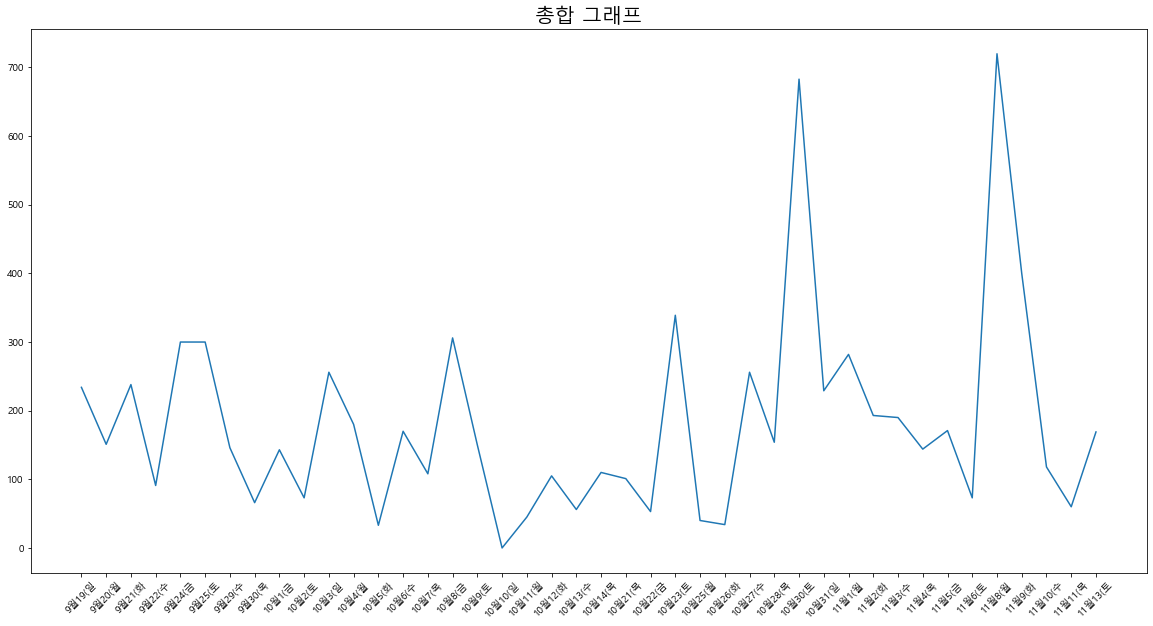

In [854]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(20,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_final['date'],df_final['총합']) ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('총합 그래프',fontsize=20) ## 타이틀 설정
plt.show()

<AxesSubplot:xlabel='date'>

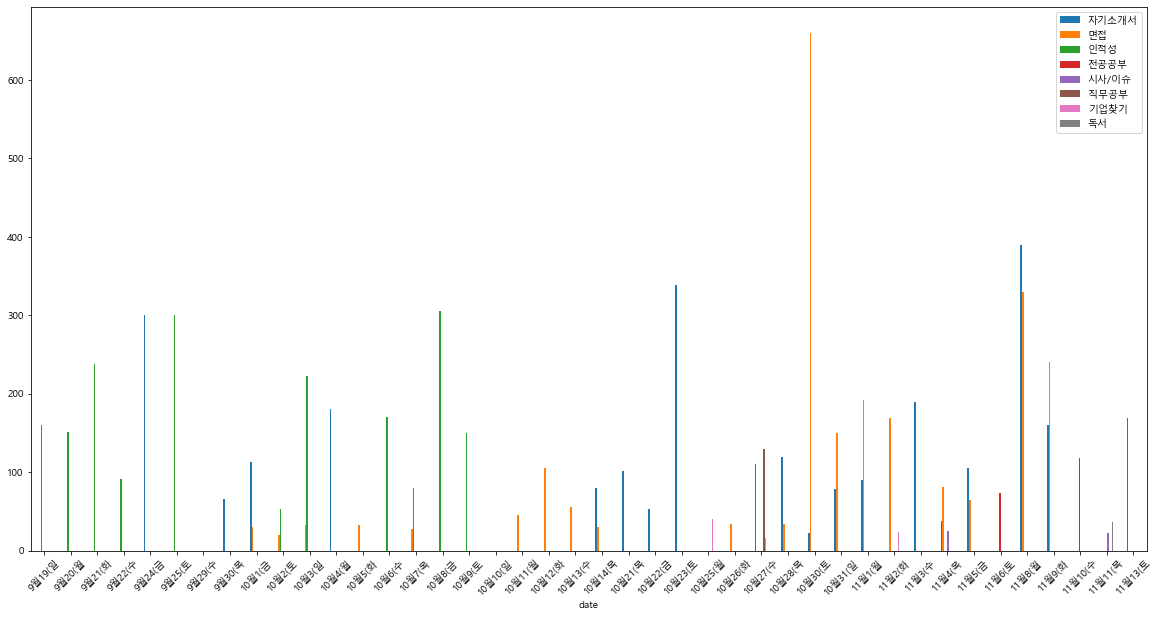

In [855]:
df_final.plot.bar(x='date', y=['자기소개서' ,'면접' , '인적성', '전공공부', '시사/이슈', '직무공부', '기업찾기', '독서']
                  , rot=45, fontsize=10, figsize=(20,10))

<AxesSubplot:xlabel='date'>

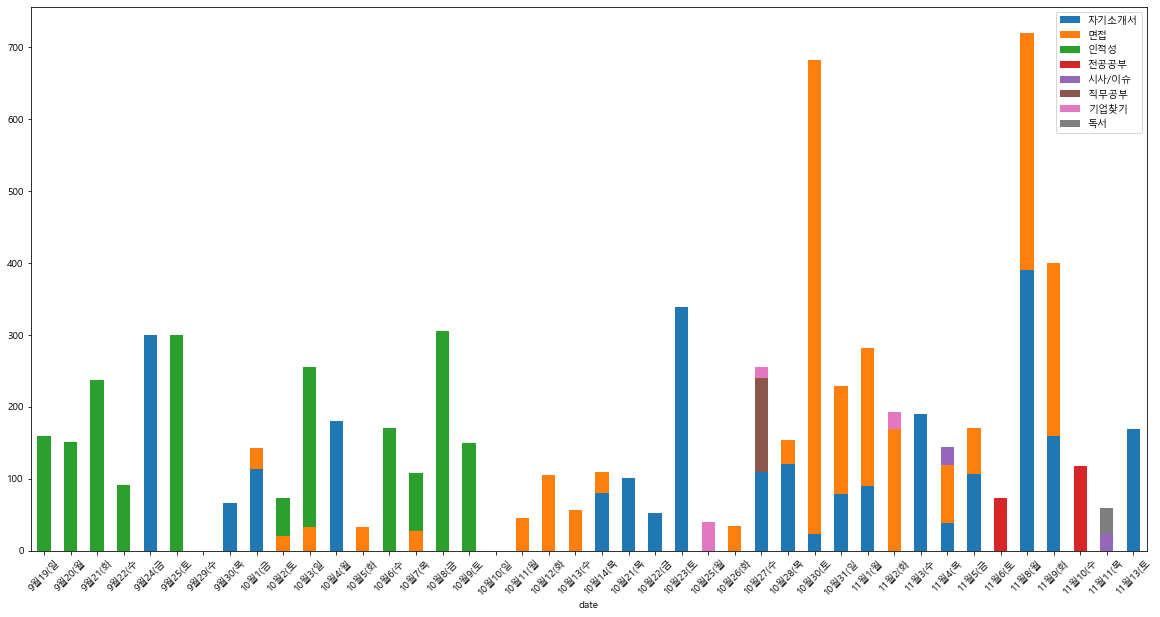

In [856]:
df_final.plot.bar(x='date', y=['자기소개서' ,'면접' , '인적성', '전공공부', '시사/이슈', '직무공부', '기업찾기', '독서']
                  , rot=45, fontsize=10, figsize=(20,10), stacked = True)

D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

<AxesSubplot:xlabel='독서', ylabel='Density'>

D:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


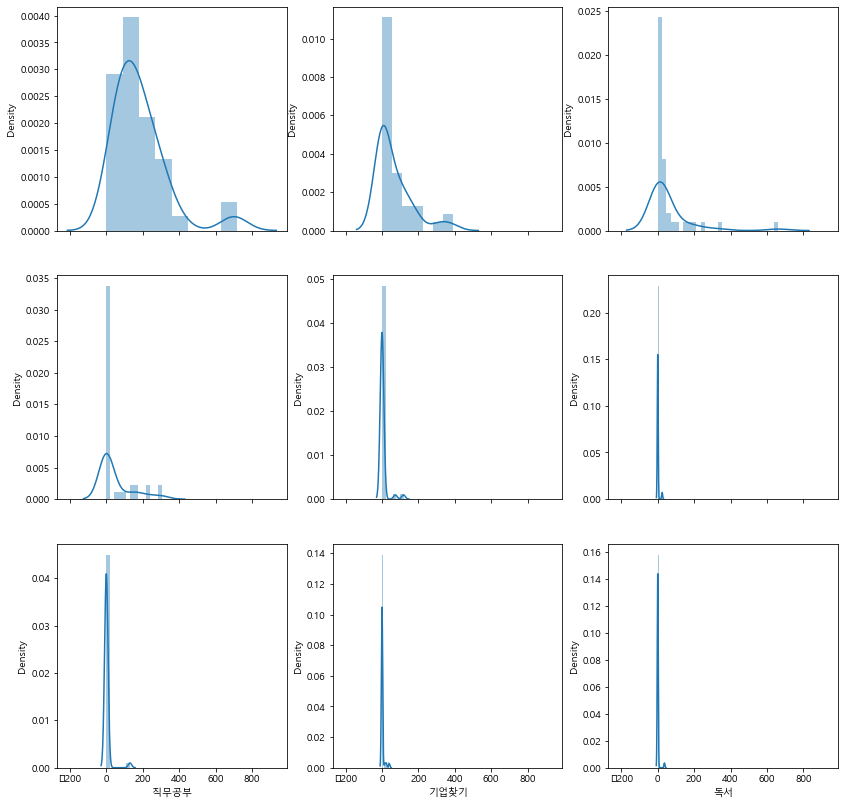

In [863]:
import seaborn as sns
f, axes = plt.subplots(3,3,figsize=(14,14), sharex=True)
sns.distplot(df_final['총합'],ax=axes[0,0])
sns.distplot(df_final['자기소개서'],ax=axes[0,1])
sns.distplot(df_final['면접'],ax=axes[0,2])
sns.distplot(df_final['인적성'],ax=axes[1,0])
sns.distplot(df_final['전공공부'],ax=axes[1,1])
sns.distplot(df_final['시사/이슈'],ax=axes[1,2])
sns.distplot(df_final['직무공부'],ax=axes[2,0])
sns.distplot(df_final['기업찾기'],ax=axes[2,1])
sns.distplot(df_final['독서'],ax=axes[2,2])

D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

<AxesSubplot:xlabel='자기소개서_LS', ylabel='Density'>

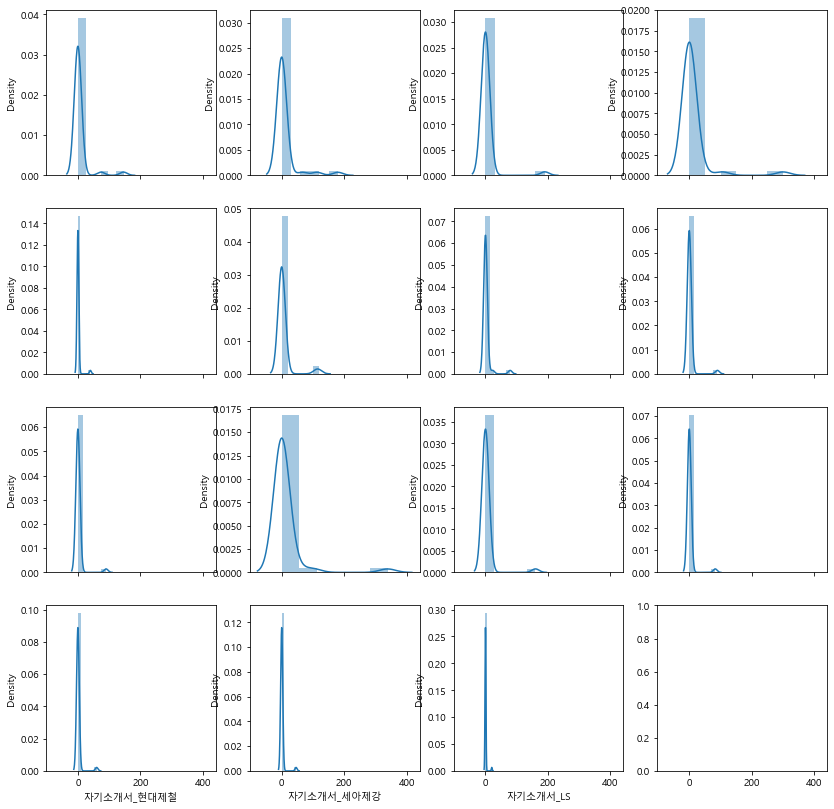

In [866]:
f, axes = plt.subplots(4,4,figsize=(14,14), sharex=True)
sns.distplot(df_final['산업공부_자동차'],ax=axes[0,0])
sns.distplot(df_final['자기소개서_LG전자'],ax=axes[0,1])
sns.distplot(df_final['자기소개서_원익'],ax=axes[0,2])
sns.distplot(df_final['자기소개서_LG이노텍'],ax=axes[0,3])
sns.distplot(df_final['자기소개서_LIG넥스원'],ax=axes[1,0])
sns.distplot(df_final['자기소개서_ssg'],ax=axes[1,1])
sns.distplot(df_final['자기소개서_한화정밀기계'],ax=axes[1,2])
sns.distplot(df_final['자기소개서_이화다이아몬드'],ax=axes[1,3])
sns.distplot(df_final['자기소개서_고려해운'],ax=axes[2,0])
sns.distplot(df_final['자기소개서_현대자동차'],ax=axes[2,1])
sns.distplot(df_final['자기소개서_현대트랜시스'],ax=axes[2,2])
sns.distplot(df_final['자기소개서_SK온'],ax=axes[2,3])
sns.distplot(df_final['자기소개서_현대제철'],ax=axes[3,0])
sns.distplot(df_final['자기소개서_세아제강'],ax=axes[3,1])
sns.distplot(df_final['자기소개서_LS'],ax=axes[3,2])

D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

<AxesSubplot:xlabel='인적성_포스코', ylabel='Density'>

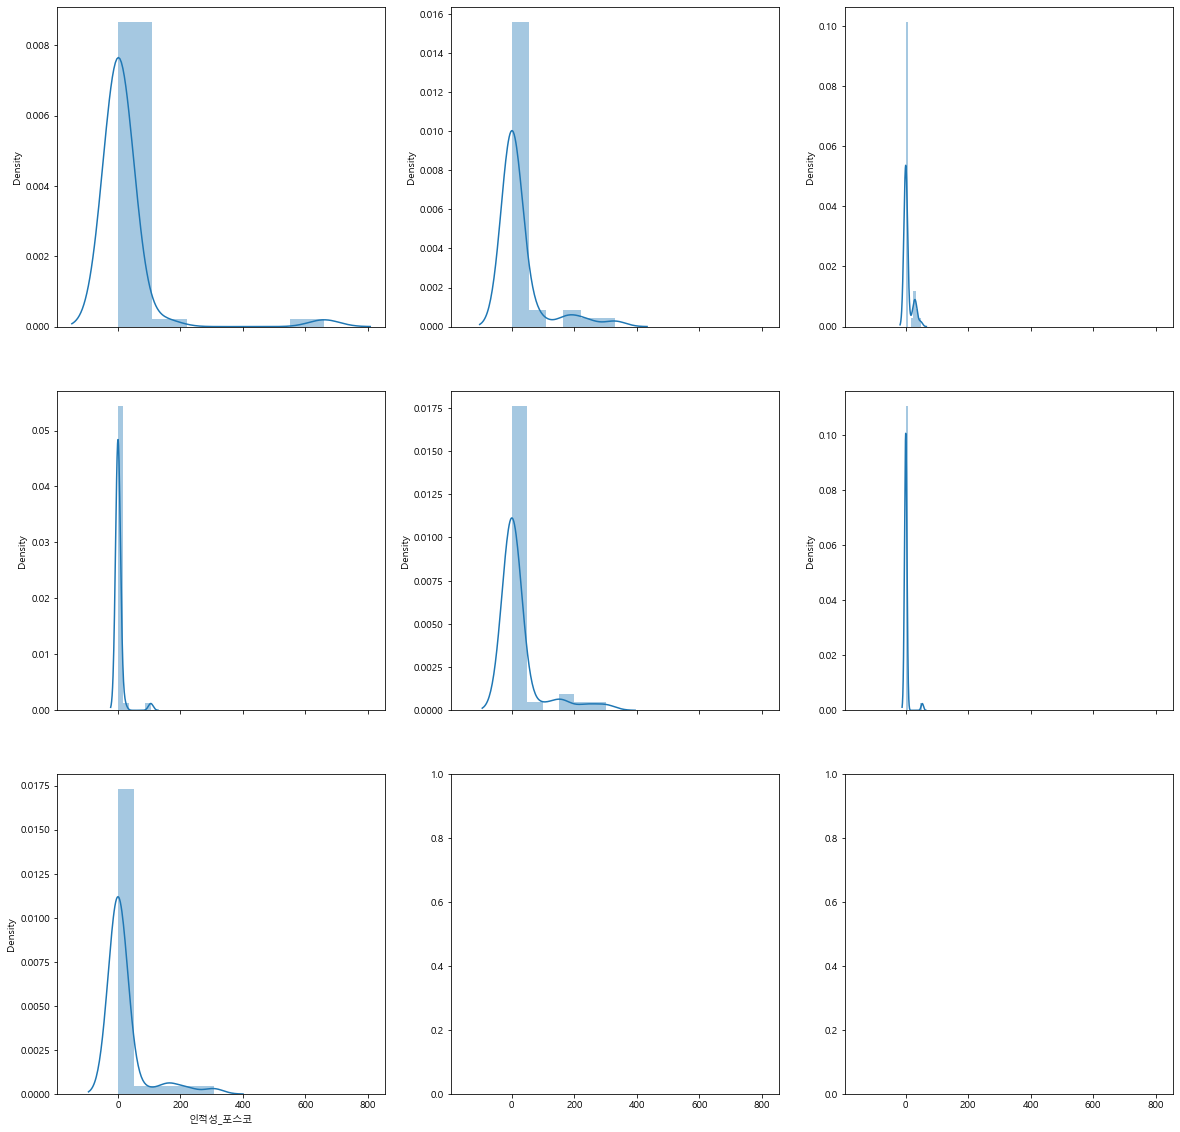

In [867]:
f, axes = plt.subplots(3,3,figsize=(20,20), sharex=True)
sns.distplot(df_final['면접_동원'],ax=axes[0,0])
sns.distplot(df_final['면접_경동나비엔'],ax=axes[0,1])
sns.distplot(df_final['면접_영어'],ax=axes[0,2])
sns.distplot(df_final['면접_포스코'],ax=axes[1,0])
sns.distplot(df_final['인적성_SK'],ax=axes[1,1])
sns.distplot(df_final['인적성_삼성전자'],ax=axes[1,2])
sns.distplot(df_final['인적성_포스코'],ax=axes[2,0])